In [1]:
from google.colab import drive
 
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


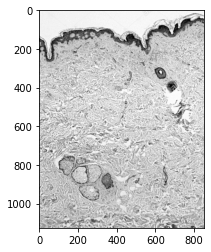

In [82]:
import numpy as np
import cv2 as cv
import random
import math
from matplotlib import pyplot as plt
import sys
sys.setrecursionlimit(10**9)
img_address = "drive/My Drive/Colab Notebooks/cell.jpeg"
img = cv.imread(img_address, 0)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [83]:
def isValidPixel(x, y, width, height):
    if x < 0 or x >= width:
        return False
    if y < 0 or y >= height:
        return False

    return True

In [84]:
def region_growing(x, y, currentLabel,labeledMatrix):
    width, height = img.shape
    labeledMatrix[x][y] = currentLabel
    neighbouringPixels = [(x-1, y), (x-1, y-1), (x-1, y+1), (x, y-1), (x, y+1), (x+1, y), (x+1, y-1), (x+1, y+1)]
    validPixels = [x for x in neighbouringPixels if isValidPixel(x[0], x[1], width, height) == True]
    notVisitedPixels = [x for x in validPixels if labeledMatrix[x[0]][x[1]] == 0]
    threshold = 200
    thresholdPixels = []
    thresholdPixels = [k for k in notVisitedPixels if np.abs(img[k[0]][k[1]] - img[x][y]) < threshold]
    for neighbour in thresholdPixels :
        region_growing(neighbour[0], neighbour[1] , currentLabel,labeledMatrix)
    return  currentLabel

In [85]:
def main_region_growing(img):
    width, height = img.shape
    labeledMatrix = np.zeros((width, height), dtype=np.int32)
    currentLabel = 0
    for y in range(0, height-1):
        for x in range(0, width-1):
            if labeledMatrix[x][y] == 0 :
                currentLabel +=1
                currentLabel = region_growing(x, y, currentLabel,labeledMatrix)
    return labeledMatrix ,currentLabel

In [86]:
def get_classes(labeledMatrix ,currentLabel):
  classes=np.zeros(currentLabel+1, np.int32)
  for i in range(0, labeledMatrix.shape[0]):
          for j in range(0, labeledMatrix.shape[1]):
            classes[labeledMatrix[i][j]] +=1
  # plt.title("Classes")
  # plt.plot(classes)
  # plt.show() 
  return classes

In [87]:
def get_labeled_img(labeledMatrix ,currentLabel):
  classes=get_classes(labeledMatrix ,currentLabel)
  new_img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
  for i in range(0, labeledMatrix.shape[0]):
      for j in range(0, labeledMatrix.shape[1]):
            if(classes[labeledMatrix[i][j]]>1000):
              new_img[i][j] = labeledMatrix[i][j]*40 , labeledMatrix[i][j]*100 ,labeledMatrix[i][j]*40
  fig=plt.figure(figsize=(8, 8))
  fig.add_subplot(1, 2, 1)
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title("Original image")
  fig.add_subplot(1, 2, 2)
  plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
  plt.title("After region growing")
  plt.show()
  return 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


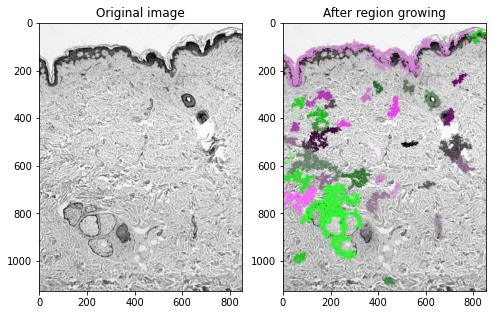

In [88]:
labeledMatrix ,currentLabel = main_region_growing(img)
get_labeled_img(labeledMatrix ,currentLabel)